In [1]:
# !pip install pandas numpy

#### load data

In [2]:
import pandas as pd
data = pd.read_csv('challenge.txt', sep='\t', header=None)

In [3]:
type(data)

pandas.core.frame.DataFrame

#### dim

In [4]:
data.shape

(1000, 10)

#### loss data

In [5]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [6]:
# ! pip install matplotlib scikit-learn

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

##### decrease dim 2D(PCA)

In [8]:
pca = PCA(n_components=2)  # کاهش به 2 بعد
data_pca = pca.fit_transform(data)

In [9]:
data_pca.shape

(1000, 2)

In [10]:
data_pca

array([[-16.34240167, -11.48378356],
       [-15.96853838, -12.01822726],
       [-16.2143533 , -11.57582298],
       ...,
       [ 25.8474006 ,  -0.29910223],
       [ 25.24124265,  -1.96028253],
       [ 27.10494104,  -1.43901953]], shape=(1000, 2))

In [ ]:
# data_pca[:,0]

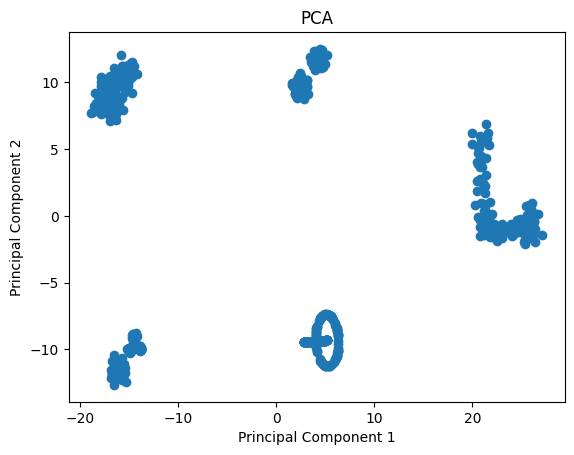

In [12]:
plt.scatter(data_pca[:,0], data_pca[:,1])

plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

##### decrease dim 2D(TSNE)

In [13]:
from sklearn.manifold import TSNE

In [14]:
tsne = TSNE(n_components=2, random_state=79)
data_tsne = tsne.fit_transform(data)

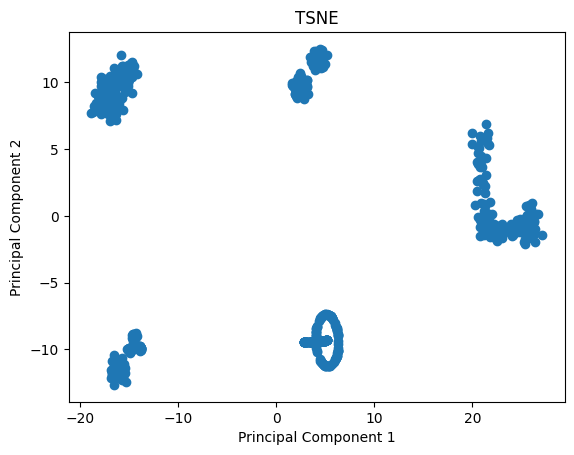

In [15]:
plt.scatter(data_pca[:,0], data_pca[:,1])

plt.title('TSNE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [16]:
data[3].mean()

np.float64(7.105427357601002e-17)

In [17]:
mean_values = data.mean()

print("میانگین هر ویژگی:")
mean_values

میانگین هر ویژگی:


0    9.600000e+00
1    1.600000e+01
2    7.105427e-17
3    7.105427e-17
4    5.684342e-17
5   -8.526513e-17
6   -2.842171e-17
7    4.973799e-17
8    7.105427e-17
9    3.552714e-17
dtype: float64

In [18]:
median_values = data.median()

print("میانه هر ویژگی:")
median_values

میانه هر ویژگی:


0     7.299342
1    19.141101
2     0.161230
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
dtype: float64

In [19]:
std_values = data.std()

print("انحراف معیار هر ویژگی:")
std_values

انحراف معیار هر ویژگی:


0     9.072724
1    15.027236
2     1.262376
3     0.997996
4     0.446317
5     0.446317
6     0.446317
7     0.446317
8     0.446317
9     0.446317
dtype: float64

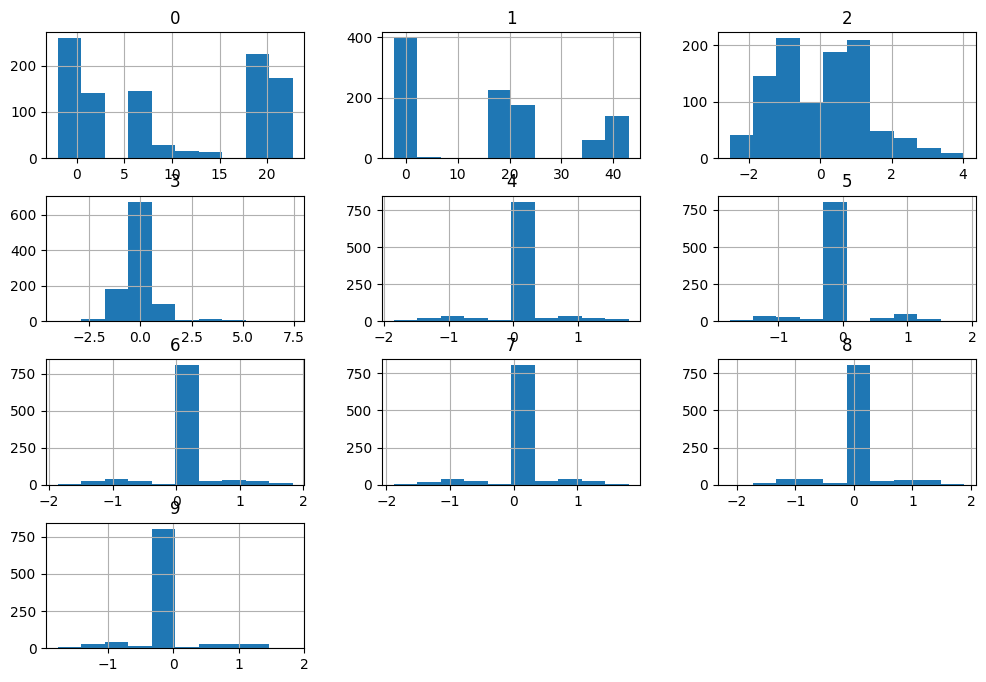

In [20]:
data.hist(figsize=(12, 8))
plt.show()

ستونهایی مثل 0 و 1 احتمالاً توزیع غیرنرمال و چندقله ای دارند که میتواند نشاندهنده پیچیدگی ساختار داده یا وجود گروههای پنهان باشد.

ستونهایی مثل 4 تا 9 با توزیع متمرکز و تقریباً نرمال، بیشتر شبیه دادههای نرمال یا با نویز کم هستند.

In [31]:
correlation_matrix = data.corr()

In [22]:
data

,0,1,2,3,4,5,6,7,8,9
0,-0.768094,-1.062899,-1.502895,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.326407,-0.725706,-1.436839,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.870501,-0.944614,-0.796163,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.198228,-0.633996,-1.031985,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.581253,-0.839979,-0.762256,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
995,8.615801,41.448963,3.758721,3.910819,0.0,0.0,0.0,0.0,0.0,0.0
996,8.360474,41.978658,2.164121,1.970064,0.0,0.0,0.0,0.0,0.0,0.0
997,7.575436,41.752979,1.839834,3.986019,0.0,0.0,0.0,0.0,0.0,0.0
998,5.955357,41.034620,3.164139,2.561729,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# !pip install seaborn

In [25]:
import seaborn as sns

Text(0.5, 1.0, 'correlation matrix')

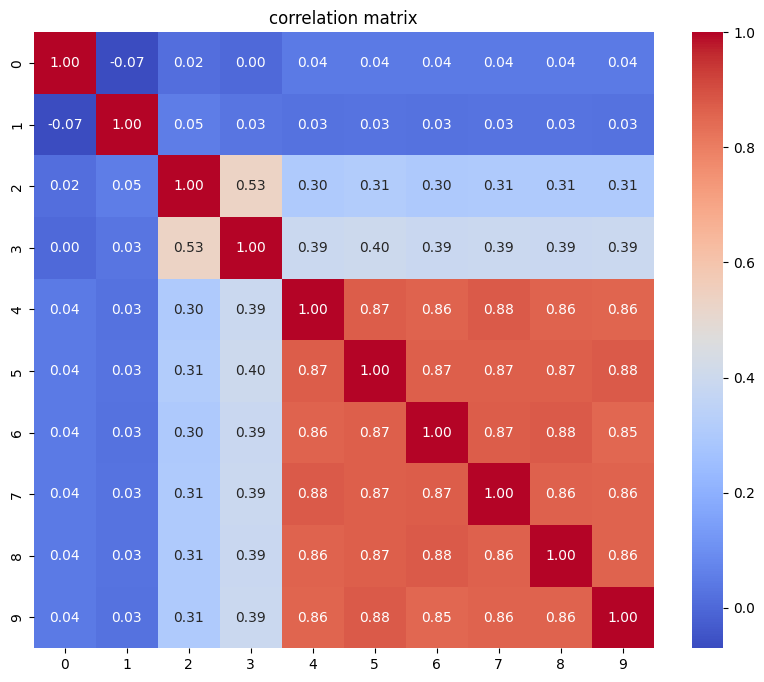

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,  fmt=".2f", cmap='coolwarm')
plt.title("correlation matrix")

ویژگی هایی که بیشتر از 0.7 و کمتر از منفی 0.7 هستن بیشترین همبستگی را دارند که در این نمونه ویژگی 4 تا 9 میشود.

##### K-Means Clustering

In [171]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
cluster_kmean = kmeans.fit_predict(data)

In [172]:
# cluster_kmean

##### DBSCAN Clustering

In [173]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=5)
cluster_dbscan = dbscan.fit_predict(data)

In [174]:
# cluster_dbscan

##### Hierarchical Clustering

In [175]:
from sklearn.cluster import AgglomerativeClustering

hier = AgglomerativeClustering(n_clusters=6)
cluster_hier = hier.fit_predict(data)

In [ ]:
# hier

,n_clusters,6
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [177]:
# cluster_hier

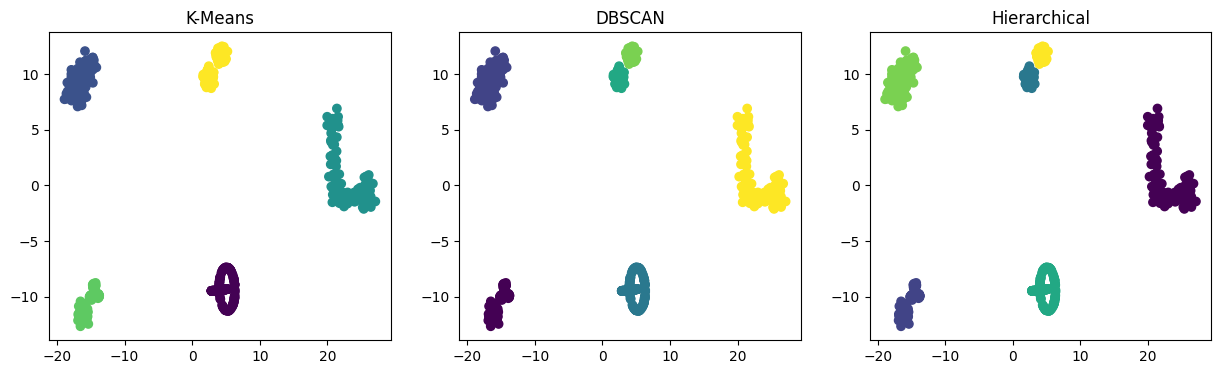

In [178]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.title("K-Means")
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_kmean)

plt.subplot(1, 3, 2)
plt.title("DBSCAN")
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_dbscan)

plt.subplot(1, 3, 3)
plt.title("Hierarchical")
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_hier)

plt.show()


In [179]:
from sklearn.metrics import silhouette_score

Score clustring with silhouette-score

In [191]:
name_cluser = ["K-Means", "DBSCAN", "Hierarchical"]
list_cluster = [cluster_kmean, cluster_dbscan, cluster_hier]

for i in range(len(list_cluster)):
    sil_score = silhouette_score(data, list_cluster[i])
    print(f"Silhouette Score for {name_cluser[i]}: {sil_score:.3f}")

Silhouette Score for K-Means: 0.848
Silhouette Score for DBSCAN: 0.832
Silhouette Score for Hierarchical: 0.832


در این تمرین در دو الگوریتم اول که قابلیت انتخاب تعداد خوشه ها بود با نمایش آن و بررسی نمره خوشه بندی سعی شده بهترین حالت هر الگوریتم را نمایش داده بشه.

Score clustring with Davies-Bouldin

In [184]:
from sklearn.metrics import davies_bouldin_score

In [192]:
name_cluser = ["K-Means", "DBSCAN", "Hierarchical"]
list_cluster = [cluster_kmean, cluster_dbscan, cluster_hier]

for i in range(len(list_cluster)):
    dbi = davies_bouldin_score(data, list_cluster[i])
    print(f"Davies-Bouldin Index for {name_cluser[i]}: {dbi:.3f}")

Davies-Bouldin Index for K-Means: 0.248
Davies-Bouldin Index for DBSCAN: 0.266
Davies-Bouldin Index for Hierarchical: 0.266


نمیشه بهترین الگوریتم را مشخص کرد همان طور که میبنید نتایج نزدیک به هم هستن و با تغییر پارامترها میشه نتیجه را تغییر داد.

#### Comparison of different parameters(K-Means)

Silhouette Score for 2 numbers cluster: 0.391


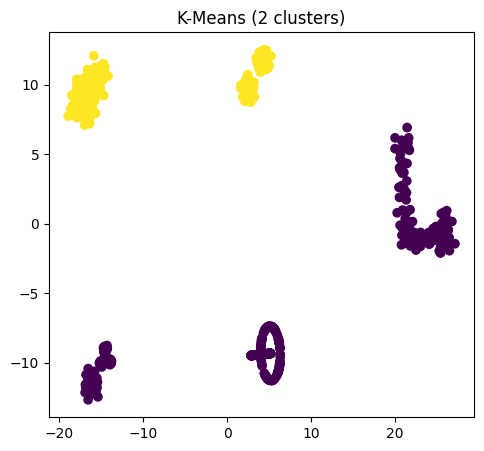

Silhouette Score for 3 numbers cluster: 0.577


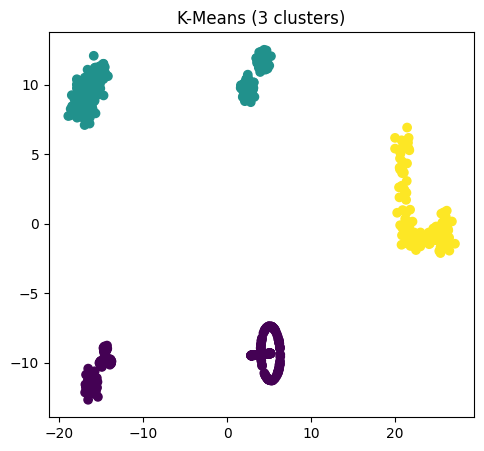

Silhouette Score for 4 numbers cluster: 0.679


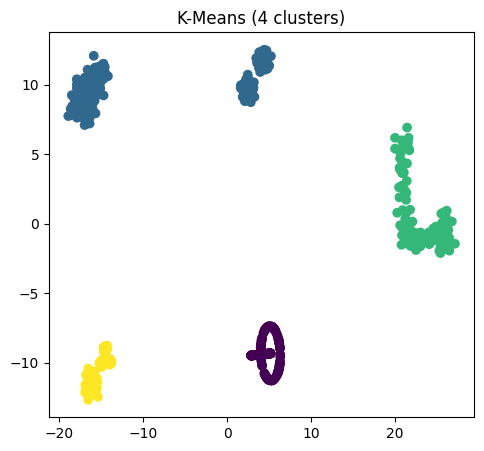

Silhouette Score for 5 numbers cluster: 0.848


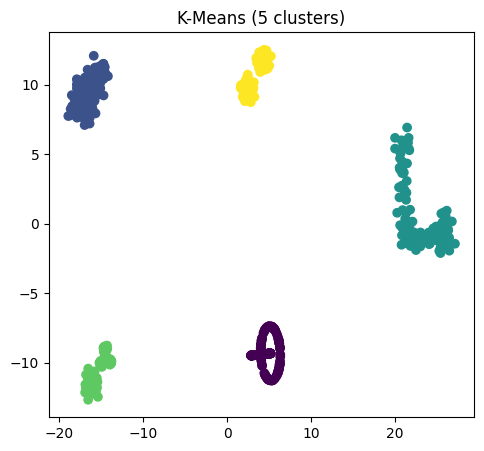

Silhouette Score for 6 numbers cluster: 0.779


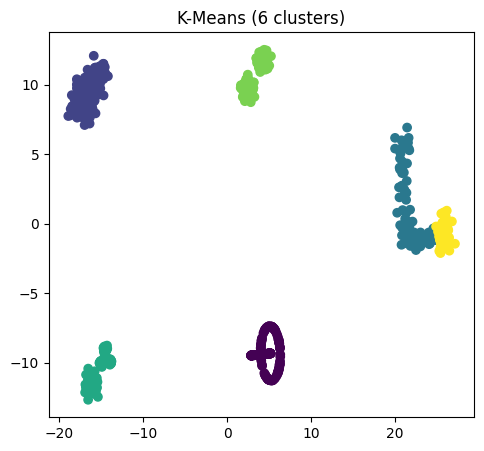

Silhouette Score for 7 numbers cluster: 0.781


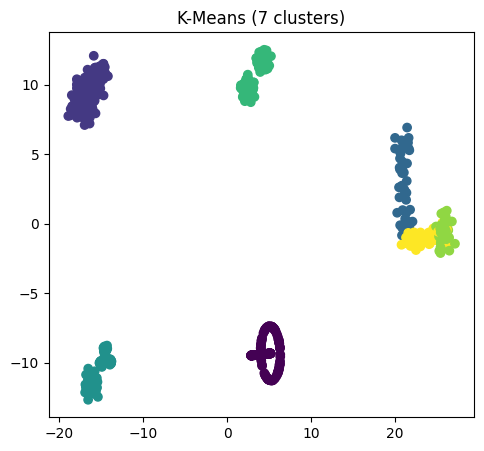

Silhouette Score for 8 numbers cluster: 0.693


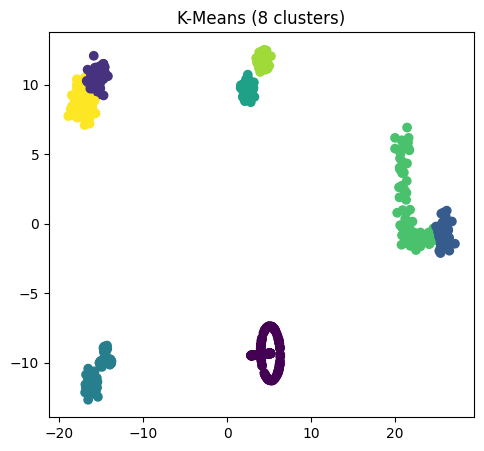

In [231]:
number_clusers = [2,3,4,5,6,7,8]
for n in number_clusers:
    kmeans = KMeans(n_clusters=n, random_state=0)
    cluster_kmean_test = kmeans.fit_predict(data)

    dbi_test = silhouette_score(data, cluster_kmean_test)
    print(f"Silhouette Score for {n} numbers cluster: {dbi_test:.3f}")

    plt.figure(figsize=(45, 5))
    plt.subplot(1, len(number_clusers), n-1)
    plt.title(f"K-Means ({n} clusters)")
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_kmean_test)
    plt.show()

<div dir="rtl">
طبق شکل و نمره آن مشخص است که عدد 8 بهترین تعداد برای دسته بندی برای این دیتا است.
</div>

#### UMAP

In [ ]:
# !pip install umap-learn

In [233]:
import umap

In [ ]:
reducer = umap.UMAP(n_components=5, random_state=42)
data_umap = reducer.fit_transform(data)